In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os
import shutil
import glob
import random
from tqdm import tqdm
from numpy import *


import matplotlib.pyplot as plt



train_names = [os.path.splitext(filename)[0] for filename in os.listdir("./trenovacie_data")]

df = pd.read_csv('df_with_types.csv')

df = df.loc[df['GalaxyID'].isin(train_names)]

display(df)

#zmensime trenovaciu mnozinu tak, ze nam ostani iba pripady zatriedene s urcitostou nad 80%

print("pocet galaxii v trenovacom datasete na nad 50%: ", len(df))


df = df[(df['Class1.1'] >= 0.80) |
        (df['Class1.2'] >= 0.80)]

df = df[(df['Class7.1'] >= 0.80) | 
        (df['Class7.2'] >= 0.80) |
        (df['Class2.1'] >= 0.80) |
        (df['Class4.1'] >= 0.80) ]

print("pocet galaxii v trenovacom datasete nad 80%: ", len(df))

types = df['type']

unique, counts = np.unique(types, return_counts=True)
print (np.asarray((unique, counts)).T)


# vidime ze ked sme nehcali len galaxie, ktore boli klasifikovane z vacsou presnostou ako 0.8 tak sa nam trenovaci dataset zmensil z 25555 na 6769
# teraz si este zmensime dataset tak, ze odstranime tie typy, ktorych klasifikacia nie je cielom nasej prace, chceme nechat iba
# "Completely round", "In between", "on edge" a "spiral"


columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class2.1': 'on_edge',
    'Class4.1': 'spiral'
}

columns = list(columns_mapper.values())
df = df.rename(columns=columns_mapper)[columns]
#df.set_index('GalaxyID', inplace=True)
display(df)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,type
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000,spiral
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,in_between
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,in_between
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,spiral
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,on_edge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61563,999777,0.013522,0.983796,0.002681,0.015684,0.968112,0.590285,0.377827,0.924279,0.043833,...,0.346315,0.327666,0.250298,0.025757,0.832544,0.041435,0.000000,0.000000,0.024542,spiral
61566,999795,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864,spiral
61568,999875,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857,spiral
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.000000,0.045334,spiral


pocet galaxii v trenovacom datasete na nad 50%:  25555
pocet galaxii v trenovacom datasete nad 80%:  6769
[['completely_round' 1012]
 ['in_between' 559]
 ['on_edge' 1394]
 ['spiral' 3804]]


,GalaxyID,completely_round,in_between,on_edge,spiral
22,100380,0.000000,0.027210,0.043650,0.926350
42,100673,0.000000,0.033635,0.029610,0.901288
48,100765,0.031908,0.037913,0.000000,0.928216
50,100801,0.006999,0.027998,0.000000,0.875162
51,100813,0.014522,0.002489,0.000000,0.952819
...,...,...,...,...,...
61530,999137,0.000000,0.000000,0.018000,0.982000
61536,999289,0.000000,0.000000,1.000000,0.000000
61544,999415,0.022477,0.000000,0.043745,0.933778
61549,999502,0.000000,0.020911,0.046845,0.909171


In [4]:
def vytvor_trenovaciu_mnozinu():
    
    os.mkdir('trenovacie_data_nad_80')
    
    #to_be_moved = random.sample(glob.glob("./images_training_rev1/*.jpg"), 6944)
    
    images_names = df["GalaxyID"]
    
    to_be_moved = []
    
    for i in images_names:
        to_be_moved.append('./images_training_rev1/' + str(i) + ".jpg")

    for f in enumerate(to_be_moved, 1):
        dest = "./trenovacie_data_nad_80"
        shutil.copy(f[1], dest)
        
    print("TRENOVACIA mnozina nad 80% vytvorena, velkost: ", len(os.listdir('./trenovacie_data_nad_80')))

vytvor_trenovaciu_mnozinu()


TRENOVACIA mnozina nad 80% vytvorena, velkost:  6769


In [8]:
# vytvorenie rotacii trenovacich obrazkov

from PIL import Image

path_img = "./trenovacie_data_nad_80"

def rotateImages(rotationAmt1, rotationAmt2):
  # for each image in the current directory
  for image in os.listdir(path_img):
    # open the image
    img = Image.open("./trenovacie_data_nad_80/" + image)
    # rotate and save the image with the same filename
    img.rotate(rotationAmt1).save('./trenovacie_data_nad_80/' +image[0:6]+ '_' + str(rotationAmt1)   +'.jpg' , 'JPEG')
    img.rotate(rotationAmt2).save('./trenovacie_data_nad_80/' +image[0:6]+ '_' + str(rotationAmt2)   +'.jpg' , 'JPEG')
    # close the image
    img.close()
    


rotateImages(90, 270)


In [2]:
#print("rotations:  ",len(os.listdir('./data/rotations/')))

# path2 = './rotations/'

# rotations_names = [os.path.splitext(filename)[0] for filename in os.listdir(path2)]

# path3 = './data/train_exp3/'

# train_exp3_names = [os.path.splitext(filename)[0] for filename in os.listdir(path3)]


rotation_names = df["GalaxyID"]



velka_df1 = pd.read_csv('./training_solutions_rev1.csv')



velka_df1 = velka_df1.loc[velka_df1['GalaxyID'].isin(rotation_names)]

print(len(velka_df1))



velka_df2 = pd.read_csv('./training_solutions_rev1.csv')
velka_df2 = velka_df2.loc[velka_df2['GalaxyID'].isin(rotation_names)]

velka_df2['GalaxyID'] =  velka_df2['GalaxyID'].astype(str) + '_90'




velka_df3 = pd.read_csv('./training_solutions_rev1.csv')
velka_df3 = velka_df3.loc[velka_df3['GalaxyID'].isin(rotation_names)]
velka_df3['GalaxyID'] =  velka_df3['GalaxyID'].astype(str) + '_270'


tabulky = [velka_df1, velka_df2, velka_df3 ]

velka_df = pd.concat(tabulky, ignore_index=True)


velka_df['GalaxyID'] = velka_df['GalaxyID'].astype(str)

velka_df.to_csv('merged_tables.csv', index=False)


6769


,GalaxyID,completely_round,in_between,on_edge,spiral
0,100380,0.000000,0.027210,0.043650,0.926350
1,100673,0.000000,0.033635,0.029610,0.901288
2,100765,0.031908,0.037913,0.000000,0.928216
3,100801,0.006999,0.027998,0.000000,0.875162
4,100813,0.014522,0.002489,0.000000,0.952819
...,...,...,...,...,...
20302,999137_180,0.000000,0.000000,0.018000,0.982000
20303,999289_180,0.000000,0.000000,1.000000,0.000000
20304,999415_180,0.022477,0.000000,0.043745,0.933778
20305,999502_180,0.000000,0.020911,0.046845,0.909171


  0%|          | 11/16245 [00:00<02:41, 100.62it/s]

(16245, 5) (4062, 5)
(20307, 5)


100%|██████████| 4062/4062 [00:37<00:00, 107.92it/s]


(16245, 64, 64, 3) (16245, 4)


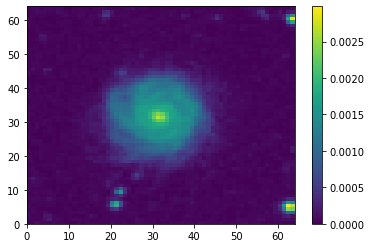

In [3]:
############## cast 2 priprava obrazkov na modelovanie

from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
#%matplotlib inline




df = velka_df

columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class2.1': 'on_edge',
    'Class4.1': 'spiral'
}

columns = list(columns_mapper.values())
df = df.rename(columns=columns_mapper)[columns]
#df.set_index('GalaxyID', inplace=True)
display(df)



len(df)

df_train, df_test = train_test_split(df, test_size=.2) #rozdelenie na trenovaciu a validacnu vzorku

print(df_train.shape, df_test.shape)

print(df.shape)



ORIG_SHAPE = (424,424)  #originalna velkost obrazkov
CROP_SIZE = (256,256)   #zaijumaa nas hlavne stred, tak si ich orezeme
IMG_SHAPE = (64,64,3)   #orezenym obrazkom znizime rozlisenie na 64x64x3... 3 to predstavuje RGB


#funkcia na upravu obrazku do pozadovaneho stavu
def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x

#funkcia na upravu vsetkych obrazkov z daneho datasetu na numpy polia , aby ich pocitac vedel precitat
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('./trenovacie_data_nad_80/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    #x_batch = np.asarray(x_batch).astype(np.float32)
    return x_batch, y_batch

X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

print(X_train.shape, y_train.shape)


#priklad obrazku po uprave
plt.pcolormesh(X_train[12,:,:,0])
print(plt.colorbar())

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras import backend as K
#from tensorflow.keras.optimizers import Adam
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(256, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Conv2D(128, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())


model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('sigmoid'))

#adam = Adam()
#model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[tf.keras.metrics.RootMeanSquaredError(name='root_mean_squared_error')])
print(model.summary())

# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

saved_model = "model_exp2_3.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(saved_model, monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='min')



train_datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True)

batch_size = 128
history = model.fit(train_datagen.flow(X_train,y_train,
                                       shuffle=False),
                    epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint])

# batch_size = 128
# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 256)       590080    
_________________________________________________________________
activation (Activation)      (None, 60, 60, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 128)       0

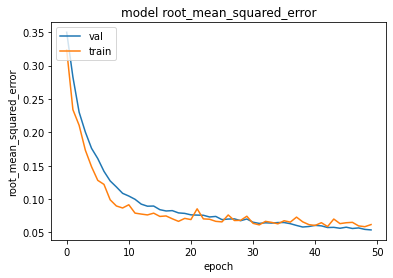

127/127 [==============================] - 2s 17ms/step - loss: 0.1427 - root_mean_squared_error: 0.0618
root_mean_squared_error: 6.18%


In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend([ 'val', 'train',], loc='upper left')
plt.show()

# loss, acc = model.evaluate(X_test, y_test, verbose=1)
# print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [8]:
############ predikovanie galaxii

from tensorflow.keras.models import load_model

def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image('./testovacie_data/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch


val_files = os.listdir('./testovacie_data/')
val_predictions = []
N_val = len(val_files)

model = load_model('model_exp2_3.hdf5')

for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X)
    val_predictions.append(y_pred)

val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('sample_sub_testovacie_data_2.csv', index=False)

print(submission_df.head())


100%|██████████| 50/50 [01:04<00:00,  1.29s/it]

     GalaxyID completely_round     in_between       on_edge        spiral
2421   100288      0.050675455       0.837174  0.0035605154   0.013346638
4150   100322    0.00017282944  0.00062711065    0.86424446  0.0055238865
4472   100986     0.0007460453   0.0049808803     0.8462117   0.008890494
3142   101074      0.013342756    0.038204927   0.015462296    0.88800013
1782   101092        0.0645906      0.8334362  0.0047650696   0.012732721


In [9]:
################# VYHODNOTENIE

submission = pd.read_csv('sample_sub_testovacie_data_2.csv')

#submission = submission_df

display(submission)

submission_ids = submission["GalaxyID"].tolist()

#print(submission_ids)

original_training_data = pd.read_csv('./training_solutions_rev1.csv')

test_df = original_training_data.loc[original_training_data['GalaxyID'].isin(submission_ids)]

test_df['GalaxyID'] = test_df['GalaxyID'].astype(str)


columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class2.1': 'on_edge',
    'Class4.1': 'spiral'
}

columns = list(columns_mapper.values())
test_df = test_df.rename(columns=columns_mapper)[columns]

#display(test_df)
#display(submission)



submission.set_index('GalaxyID', inplace=True)
test_df.set_index('GalaxyID', inplace=True)

predikovana = submission.astype(float).idxmax(axis=1)
testovacia = test_df.astype(float).idxmax(axis=1)

unique, counts = np.unique(testovacia, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique(predikovana, return_counts=True)
print (np.asarray((unique, counts)).T)

,GalaxyID,completely_round,in_between,on_edge,spiral
0,100288,0.050675,0.837174,0.003561,0.013347
1,100322,0.000173,0.000627,0.864244,0.005524
2,100986,0.000746,0.004981,0.846212,0.008890
3,101074,0.013343,0.038205,0.015462,0.888000
4,101092,0.064591,0.833436,0.004765,0.012733
...,...,...,...,...,...
6384,999264,0.017986,0.019087,0.014861,0.911263
6385,999293,0.042540,0.828959,0.004344,0.013207
6386,999475,0.010098,0.081329,0.791551,0.029173
6387,999569,0.076072,0.824327,0.003180,0.006845


[['completely_round' 1700]
 ['in_between' 1546]
 ['on_edge' 1040]
 ['spiral' 2103]]
[['completely_round' 1711]
 ['in_between' 1448]
 ['on_edge' 1043]
 ['spiral' 2187]]


<ipython-input-9-29a922499582>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GalaxyID'] = test_df['GalaxyID'].astype(str)


[[1567   57    1   75]
 [ 115 1328   16   87]
 [   1   19  995   25]
 [  28   44   31 2000]]
Recall:  [0.92176471 0.85899094 0.95673077 0.95102235]
Precision:  [0.91583869 0.91712707 0.95397891 0.91449474]
                  precision    recall  f1-score   support

completely round       0.92      0.92      0.92      1700
      in between       0.92      0.86      0.89      1546
         on edge       0.95      0.96      0.96      1040
          spiral       0.91      0.95      0.93      2103

        accuracy                           0.92      6389
       macro avg       0.93      0.92      0.92      6389
    weighted avg       0.92      0.92      0.92      6389



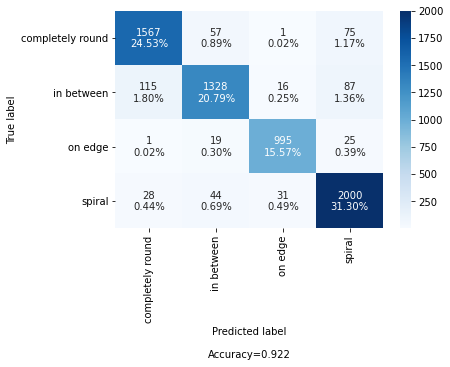

In [10]:
#################### METRIKY 

import seaborn as sn
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix



import os
import shutil
import glob
import random
from tqdm import tqdm
from numpy import *


import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

conf_mat = confusion_matrix(testovacia, predikovana)       
print(conf_mat)
#sn.heatmap(conf_mat, annot=True)

categories = ['completely round', 'in between', 'on edge', 'spiral']
make_confusion_matrix(conf_mat,
                      categories=categories)

from sklearn.metrics import recall_score
print("Recall: ", recall_score(testovacia, predikovana, average=None))

print("Precision: ", precision_score(testovacia, predikovana, average=None))

from sklearn.metrics import classification_report
print(classification_report(testovacia, predikovana, target_names=categories))